# Ultimate Technologies Inc. Take-Home Challenge

created on Google Colab.

## Initiating Project

### Importing Libraries

In [1]:
# Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Modeling Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ttest_ind

In [27]:
# Import Additional Libraries
from copy import deepcopy
from matplotlib.dates import HourLocator
from itertools import product

In [4]:
# Changing default plot sizes 
plt.rcParams['figure.figsize'] = [10, 7.5]

### Loading Dataset

In [5]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Location on Google Drive
repo = 'challenge_ultimate'
%cd /content/drive/MyDrive/colab_notebooks/GitHub/{repo}/

# Load data files into pandas
logins = pd.read_json('logins.json',convert_dates=True)
ultimate = pd.read_json('ultimate_data_challenge.json')

/content/drive/MyDrive/colab_notebooks/GitHub/challenge_ultimate


In [7]:
# Unmount Google Drive.
drive.flush_and_unmount()

## Data Wrangling

### Logins Dataset

In [8]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [10]:
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [11]:
# Characterizing the NaN within the data.
logins.isna().sum()

login_time    0
dtype: int64

### Ulitamate Dataset

In [12]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
# Characterizing the NaN within the data.
ultimate.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are NaN values within the dataset.  After EDA, will probably use median to fill in the values for the avg_rating(s) variables and ignore the phone NaNs or replace with zero.

## Exploratory Data Analysis

In [16]:
# Creating a Counter for logins by 15-minute intervals.
logins_count = deepcopy(logins)
logins_count["count"] = 1
logins_count = logins_count.set_index("login_time")
logins_count_15min = logins_count.groupby(pd.Grouper(freq="15Min")).sum()
logins_count_15min.index.name = "DateTime"

In [17]:
logins_count.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [18]:
logins_count_15min.head()

,count
DateTime,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [19]:
logins_count_15min.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [20]:
# Creating a Counter for logins by day intervals.
logins_count_day = logins_count_15min.groupby(logins_count_15min.index.date).mean()
logins_count_day = logins_count_day[1 : -1]
logins_count_day.index.name = "Date"

In [21]:
logins_count_day.head()

,count
Date,
1970-01-02,7.093750
1970-01-03,8.260417
1970-01-04,8.208333
1970-01-05,4.781250
1970-01-06,5.583333


In [22]:
logins_count_day.describe()

,count
count,101.000000
mean,9.553940
std,3.515482
min,4.781250
25%,6.750000
50%,8.718750
75%,11.895833
max,19.677083


Text(0.5, 1.0, 'Login Count - Day')

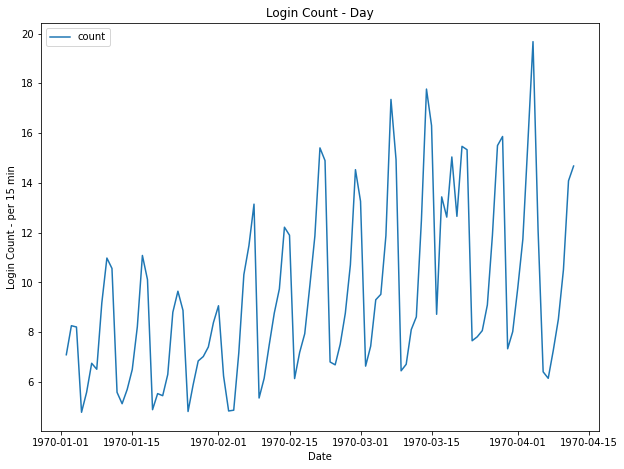

In [37]:
# Creating plot of login count by day.
logins_count_day.plot(y="count")
plt.ylabel("Login Count - per 15 min")
plt.title("Login Count - Day")

Text(0.5, 1.0, 'Login Count - Day of Week')

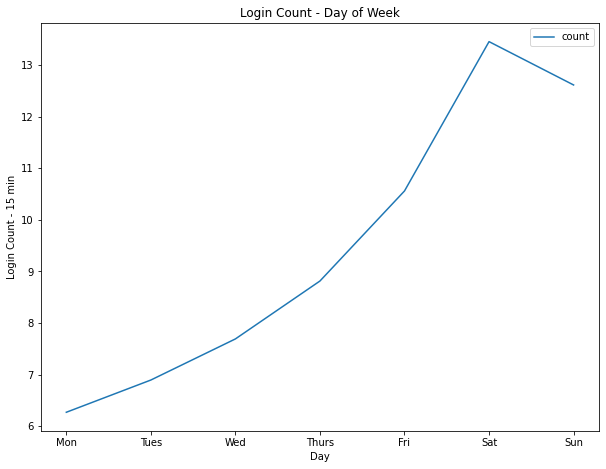

In [24]:
# Plot Mean Count by Day of the Week
logins_count_week = logins_count_15min["1970-01-02" : "1970-04-12"].groupby(logins_count_15min["1970-01-02" : "1970-04-12"].index.weekday).mean()
logins_count_week.index.name = "Day"

logins_count_week.plot(y="count")
plt.xticks(ticks=range(7), labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Day of Week")

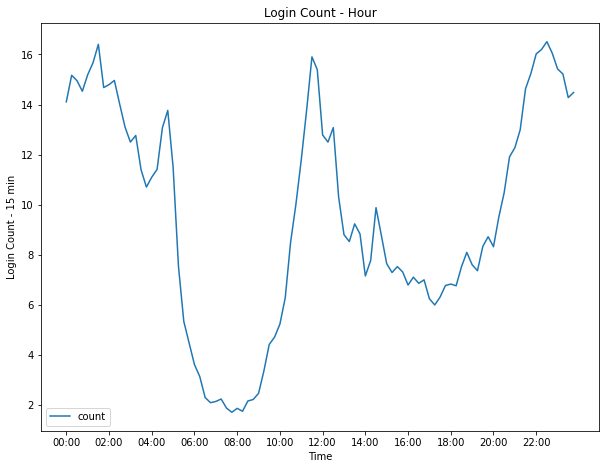

In [25]:
# Plot Mean Login Count by Hour
logins_count_ave_day = logins_count_15min.groupby(logins_count_15min.index.time).mean()
logins_count_ave_day.index.name = "Time"

logins_count_ave_day.plot(y="count")
plt.xticks([7200 * h for h in range(12)])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Hour")
plt.show()

Text(0.5, 1.0, 'Login Count by Time with Days of the Week')

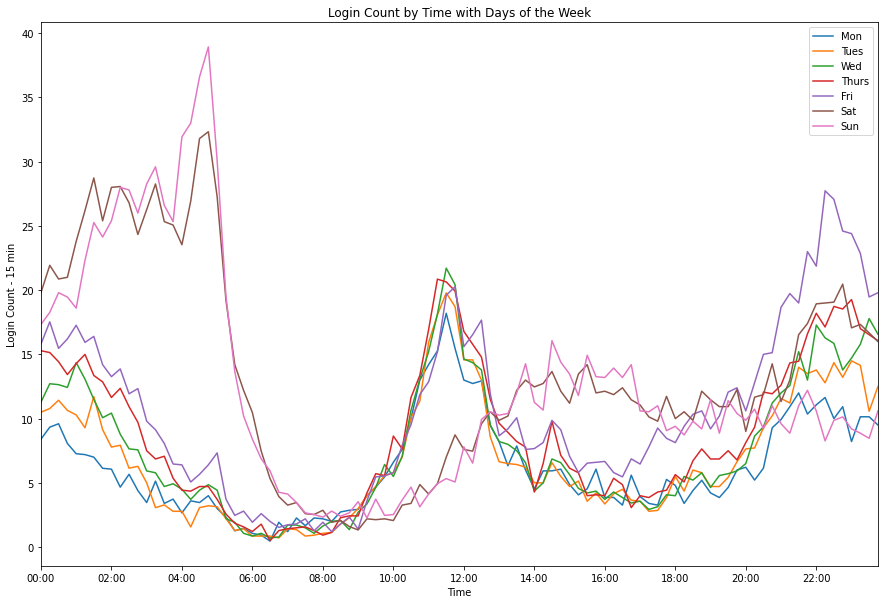

In [28]:
# Plot Mean Count for Each Day of the Week

pd.plotting.register_matplotlib_converters()

logins_count_ave_dayofweek_time = logins_count_15min.groupby([logins_count_15min.index.weekday, logins_count_15min.index.time]).mean()

day_of_week = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
plt.figure(figsize=(15, 10))
for i in range(7):
    plt.plot(logins_count_ave_dayofweek_time.loc[i], label=day_of_week[i])
plt.ylabel("Login Count - 15 min")
plt.xticks([7200 * h for h in range(12)])
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.xlim([0, 3600 * 23.75])
plt.title("Login Count by Time with Days of the Week")

Text(0.5, 1.0, 'Login Count by Day and Time')

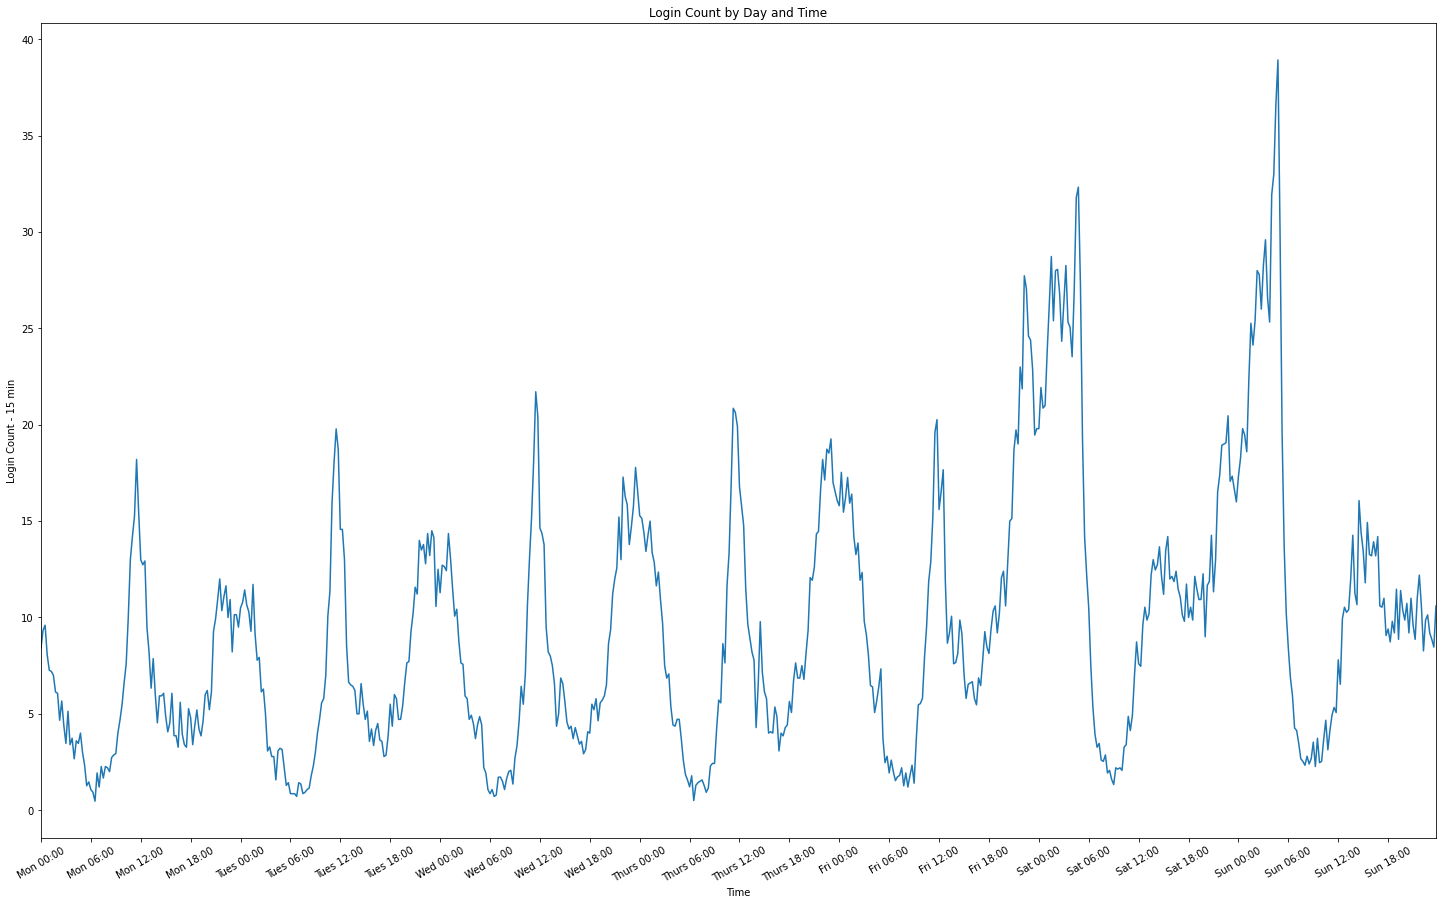

In [36]:
# Plot of Login Count by Day and Time
timeIndex = [i * 15 for i in range(len(logins_count_ave_dayofweek_time))]

plt.figure(figsize=(25, 15))
plt.plot(timeIndex, logins_count_ave_dayofweek_time["count"])
day_of_week = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
xlabels = list(map(lambda x: x[0] + " " + x[1], product(day_of_week, ["00:00", "06:00", "12:00", "18:00"])))
plt.xlabel("Time")
plt.xticks([i * 6 * 60 for i in range(4 * 7)], xlabels, rotation=30)
plt.xlim([0, 60 * (24 * 6 + 23.75)])
plt.ylabel("Login Count - 15 min")
plt.title('Login Count by Day and Time')

## Preprocessing

In [38]:
# Convert Object Datatype to Datetime Datatype
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)
ultimate.last_trip_date = pd.to_datetime(ultimate.last_trip_date)

In [39]:
# Confirm conversion
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [40]:
# Determine last last_trip_date
ultimate.describe(datetime_is_numeric=True)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


The last last_trip_date is '2014-07-01'.  The cutoff one month before the last last_trip_date is therefore '2014-06-01'.

In [41]:
# Define cutoff date for users to be "retained" (if active in the preceding 30 days).
cutoff = pd.to_datetime('2014-06-01')

In [42]:
# Add Binary Col to dataset to indicate if user has been "retained"
ultimate["retained"] = ultimate.apply(lambda i: 1 if i["last_trip_date"] > cutoff else 0, axis=1)

In [46]:
ultimate.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [44]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [47]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  retained                50000 non-null  int64 

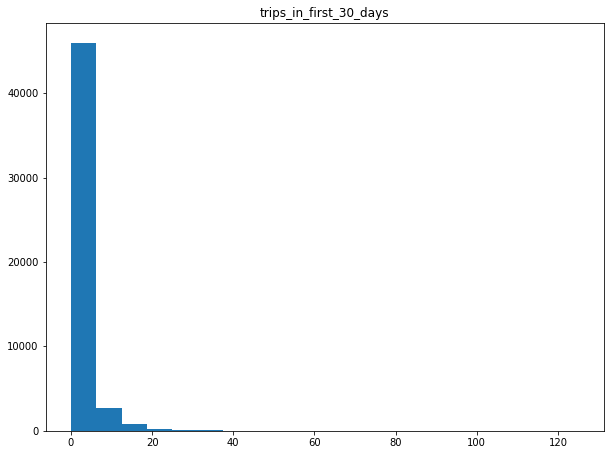

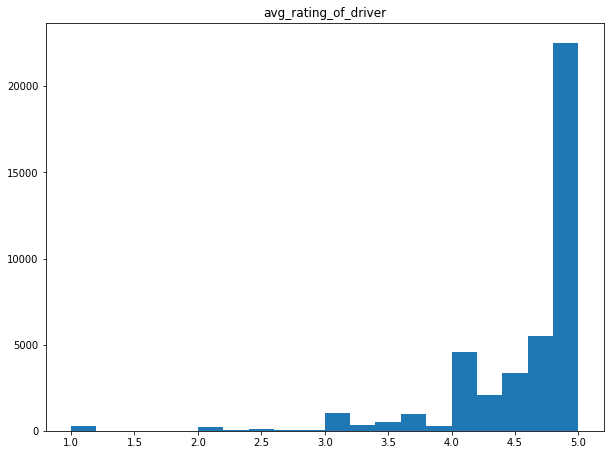

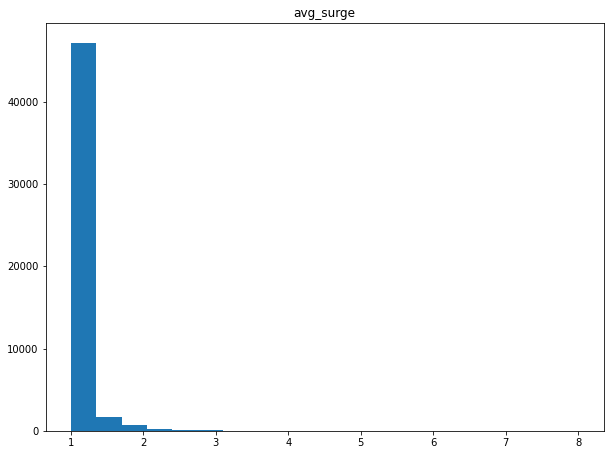

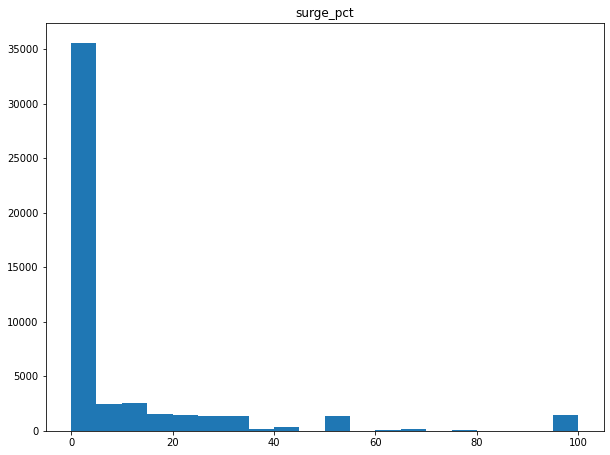

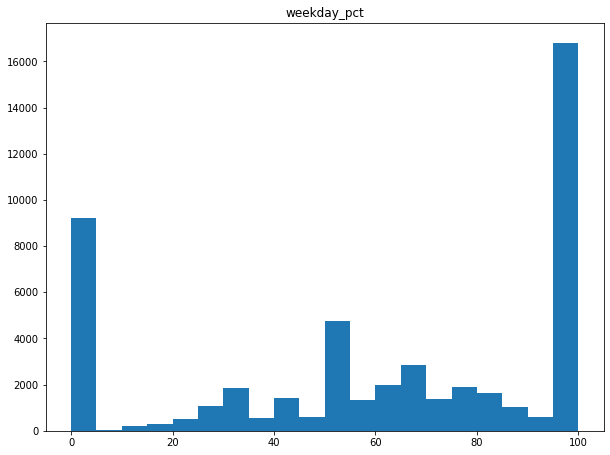

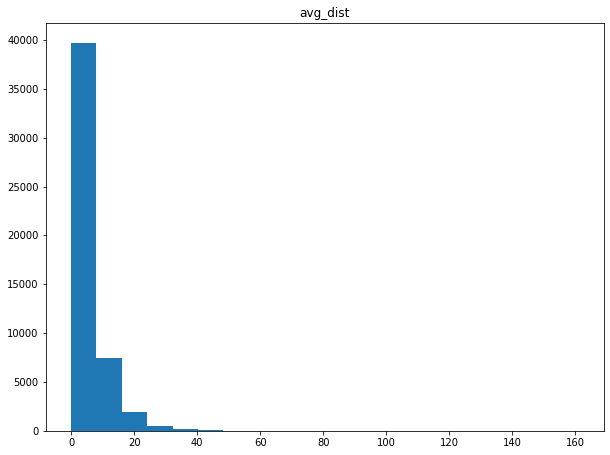

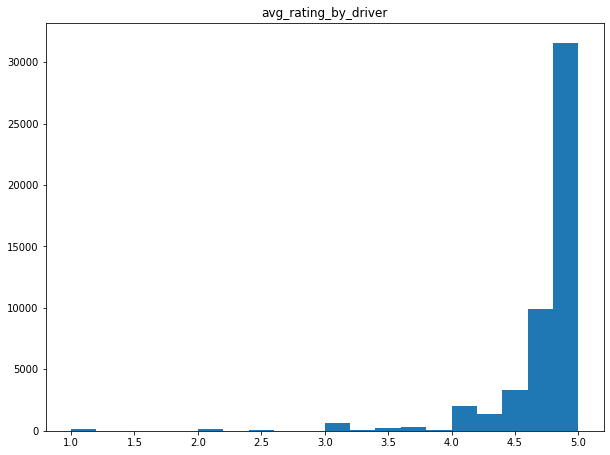

In [48]:
# Quick Plot of continuous independent variable distributions
cont_indep_var_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

for col in cont_indep_var_cols:
    plt.hist(ultimate[col], bins=20)
    plt.title(col)
    plt.show()

In [49]:
# There are NaN values in avg_rating cols.  Impute missing values with median.
ultimate.avg_rating_by_driver = ultimate.avg_rating_by_driver.replace(np.nan, ultimate.avg_rating_by_driver.median())
ultimate.avg_rating_of_driver = ultimate.avg_rating_of_driver.replace(np.nan, ultimate.avg_rating_of_driver.median())

In [50]:
# Drop remaining rows with NaN values
ultimate.dropna(inplace=True, axis=0)
ultimate.reset_index(inplace=True)

In [51]:
# Confirm preprocessing steps
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   49604 non-null  int64         
 1   city                    49604 non-null  object        
 2   trips_in_first_30_days  49604 non-null  int64         
 3   signup_date             49604 non-null  datetime64[ns]
 4   avg_rating_of_driver    49604 non-null  float64       
 5   avg_surge               49604 non-null  float64       
 6   last_trip_date          49604 non-null  datetime64[ns]
 7   phone                   49604 non-null  object        
 8   surge_pct               49604 non-null  float64       
 9   ultimate_black_user     49604 non-null  bool          
 10  weekday_pct             49604 non-null  float64       
 11  avg_dist                49604 non-null  float64       
 12  avg_rating_by_driver    49604 non-null  float6

In [52]:
ultimate.columns

Index(['index', 'city', 'trips_in_first_30_days', 'signup_date',
       'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [53]:
# Preprocess Catagorical Data
cat_data = ultimate.loc[:,['city', 'phone', 'ultimate_black_user']]
encoder = OneHotEncoder(categories="auto", sparse=False, drop='first')
ohe_cat_data = pd.DataFrame(encoder.fit_transform(cat_data))
ohe_cat_data.columns = encoder.get_feature_names()
mod_ultimate = ultimate.drop(['index', 'city', 'signup_date', 'phone', 'last_trip_date', 'ultimate_black_user'], axis=1)
mod_ultimate = mod_ultimate.join(ohe_cat_data, how='left')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
# Check preprocessing.
mod_ultimate.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,x0_King's Landing,x0_Winterfell,x1_iPhone,x2_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1.0,0.0,1.0,1.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0.0,0.0,0.0,0.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0.0,0.0,1.0,0.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1.0,0.0,1.0,1.0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0.0,1.0,0.0,0.0


## Modeling

In [56]:
# Create Test Train Split for Modeling.
X = mod_ultimate.drop("retained", axis=1)
y = mod_ultimate[["retained"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73, stratify=y)

In [57]:
# Create GridSearch / Cross-Validation for hyperparamters for Random Forest model
n_estimator_space = [50, 100, 200]
max_features_space = [2, 'sqrt', 5, 10]
class_weight_space = ['balanced', 'balanced_subsample', None]
criterion_space = ['gini', 'entropy']
param_grid = {'n_estimators': n_estimator_space, 
              'max_features': max_features_space, 
              'class_weight': class_weight_space, 
              'criterion': criterion_space}

# Using a Random Forest Model.
rf_tune = RandomForestClassifier(random_state=73)
rf_cv = GridSearchCV(rf_tune, param_grid, cv=3, scoring='roc_auc')
rf_cv.fit(X_train, y_train.values.ravel())

# Printing Model parameters and performance
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 5, 'n_estimators': 200}
0.8298546415232154


In [58]:
# Create Random Forest Model
rf = RandomForestClassifier(n_estimators = 200, 
                            max_features='sqrt', 
                            random_state=73, 
                            criterion='entropy', 
                            class_weight='balanced_subsample')

rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

## Model Assessment

In [60]:
# Model Assessment
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[6399 1457]
 [1491 3054]]


In [61]:
# Model Assessment
# Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7856
           1       0.68      0.67      0.67      4545

    accuracy                           0.76     12401
   macro avg       0.74      0.74      0.74     12401
weighted avg       0.76      0.76      0.76     12401



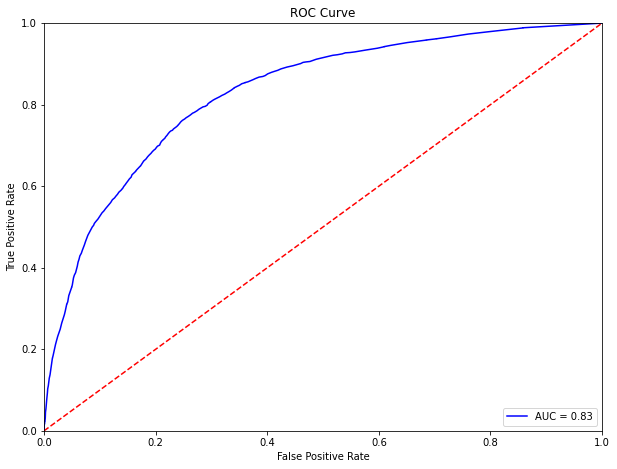

In [62]:
# Plotting the ROC Curve 
probs = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs, pos_label=1.)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

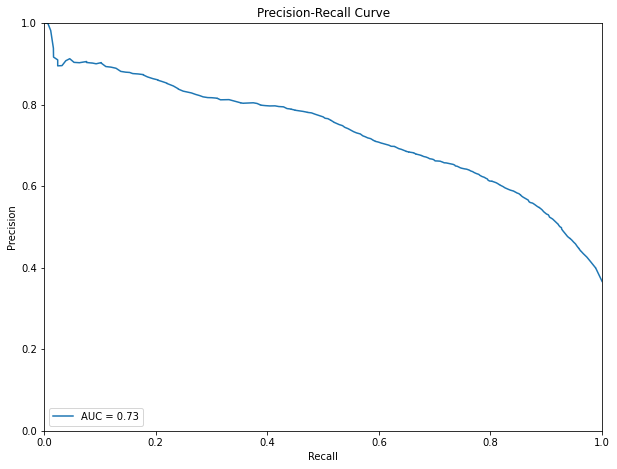

In [63]:
# Plotting the Precision-Recall Curve
probs = y_prob[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs, pos_label=1.)
prc_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall Curve")
plt.plot(recall, precision, label= 'AUC = %0.2f' % prc_auc)
plt.legend(loc = 'lower left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()